In [3]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Bước 1: Tải dữ liệu
Ames = pd.read_csv('../data/Ames.csv')

# Bước 2: Thiết lập mức tin cậy và số bậc tự do
confidence_level = 0.95
degrees_freedom = Ames['SalePrice'].count() - 1

# Bước 3: Tính khoảng tin cậy sử dụng phân phối t
confidence_interval = stats.t.interval(
    confidence_level,
    degrees_freedom,
    loc=Ames['SalePrice'].mean(),
    scale=Ames['SalePrice'].sem()
)

# Bước 4: In kết quả khoảng tin cậy
print(f"Khoảng tin cậy 95% cho giá bán trung bình là từ "
      f"${confidence_interval[0]:,.2f} đến ${confidence_interval[1]:,.2f}.")

Khoảng tin cậy 95% cho giá bán trung bình là từ $175,155.78 đến $180,951.11.


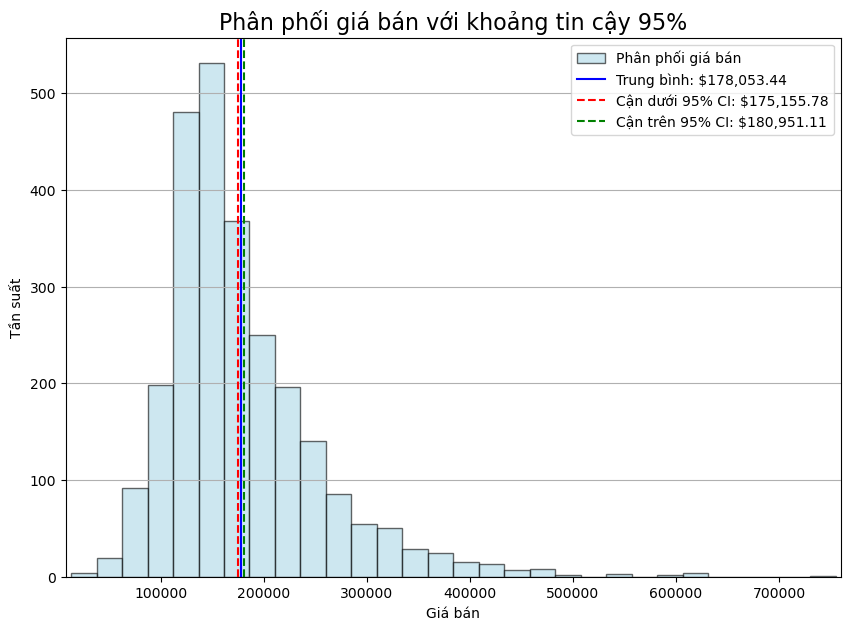

In [4]:
# Bước 5: Vẽ biểu đồ phân phối giá bán và đánh dấu khoảng tin cậy
plt.figure(figsize=(10, 7))
plt.hist(Ames['SalePrice'], bins=30, color='lightblue', edgecolor='black', alpha=0.6, label='Phân phối giá bán')

# Đường thẳng trung bình mẫu
plt.axvline(Ames['SalePrice'].mean(), color='blue', linestyle='-', label=f'Trung bình: ${Ames["SalePrice"].mean():,.2f}')

# Các đường giới hạn khoảng tin cậy
plt.axvline(confidence_interval[0], color='red', linestyle='--', label=f'Cận dưới 95% CI: ${confidence_interval[0]:,.2f}')
plt.axvline(confidence_interval[1], color='green', linestyle='--', label=f'Cận trên 95% CI: ${confidence_interval[1]:,.2f}')

# Cài đặt biểu đồ
plt.title('Phân phối giá bán với khoảng tin cậy 95%', fontsize=16)
plt.xlabel('Giá bán')
plt.ylabel('Tần suất')
plt.legend()
plt.grid(axis='y')
plt.xlim([min(Ames['SalePrice']) - 5000, max(Ames['SalePrice']) + 5000])
plt.show()

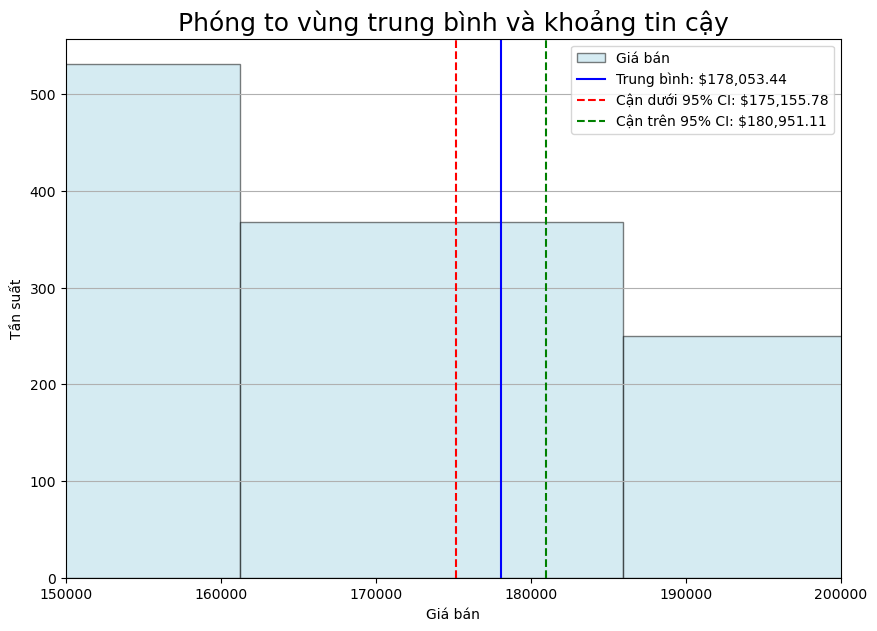

In [6]:
# Thiết lập mức tin cậy và bậc tự do
confidence_level = 0.95
degrees_freedom = Ames['SalePrice'].count() - 1

# Tính khoảng tin cậy
confidence_interval = stats.t.interval(
    confidence_level,
    degrees_freedom,
    loc=Ames['SalePrice'].mean(),
    scale=Ames['SalePrice'].sem()
)

# Vẽ biểu đồ phóng to vùng trung bình và khoảng tin cậy
plt.figure(figsize=(10, 7))
plt.hist(Ames['SalePrice'], bins=30, color='lightblue', edgecolor='black', alpha=0.5, label='Giá bán')

# Giới hạn trục x từ $150,000 đến $200,000 để tập trung vào vùng trung tâm
plt.xlim([150000, 200000])

# Đường trung bình mẫu
plt.axvline(Ames['SalePrice'].mean(), color='blue', linestyle='-', label=f'Trung bình: ${Ames["SalePrice"].mean():,.2f}')

# Các cận khoảng tin cậy
plt.axvline(confidence_interval[0], color='red', linestyle='--', label=f'Cận dưới 95% CI: ${confidence_interval[0]:,.2f}')
plt.axvline(confidence_interval[1], color='green', linestyle='--', label=f'Cận trên 95% CI: ${confidence_interval[1]:,.2f}')

# Nhãn và tiêu đề
plt.title('Phóng to vùng trung bình và khoảng tin cậy', fontsize=18)
plt.xlabel('Giá bán')
plt.ylabel('Tần suất')
plt.legend()
plt.grid(axis='y')
plt.show()